# 롯데월드타워(잠실역2번출구 쪽) Station

### 2023-06 ~ 2024-05까지 

In [142]:
import pandas as pd

In [143]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import matplotlib.pyplot as plt
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [144]:
df = pd.read_csv("../data/반납추가.csv")
df.head()

/var/folders/b4/mj76666j60z2b6lck86w49wh0000gn/T/ipykernel_10922/213190732.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/반납추가.csv")


,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID,자전거구분,자치구,반납 자치구
0,SPB-62435,2024-04-01 00:02:22,2637,아시아지하보도 14번 출구,0,2024-04-01 00:02:35,2637.0,아시아지하보도 14번 출구,0,0,0.00,1974,\N,내국인,ST-1864,ST-1864,일반자전거,송파구,송파구
1,SPB-58734,2024-04-01 00:03:25,1295,잠실역 8번출구,0,2024-04-01 00:05:04,4486.0,홈플러스 잠실점,0,1,0.00,2004,M,내국인,ST-1584,ST-2596,일반자전거,송파구,송파구
2,SPB-43679,2024-04-01 00:01:12,4880,송파청소년센터,0,2024-04-01 00:05:08,4893.0,문정법조단지12,0,3,471.33,1997,M,내국인,ST-2957,ST-2972,일반자전거,송파구,송파구
3,SPB-31592,2024-04-01 00:05:20,2621,한성백제역 2번 출구,0,2024-04-01 00:05:30,2621.0,한성백제역 2번 출구,0,0,0.10,2003,M,내국인,ST-1719,ST-1719,일반자전거,송파구,송파구
4,SPB-69307,2024-04-01 00:00:53,4465,건영아파트앞 사거리,0,2024-04-01 00:09:05,4490.0,송파파인타운 10단지 1005동,0,8,1062.41,2000,NaN,내국인,ST-2581,ST-2598,일반자전거,송파구,송파구


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5199804 entries, 0 to 5199803
Data columns (total 19 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     int64  
 5   반납일시      object 
 6   반납대여소번호   float64
 7   반납대여소명    object 
 8   반납거치대     object 
 9   이용시간(분)   int64  
 10  이용거리(M)   float64
 11  생년        object 
 12  성별        object 
 13  이용자종류     object 
 14  대여대여소ID   object 
 15  반납대여소ID   object 
 16  자전거구분     object 
 17  자치구       object 
 18  반납 자치구    object 
dtypes: float64(2), int64(3), object(14)
memory usage: 753.8+ MB


### 송파구 거치대수 확인

In [146]:
df_station = pd.read_csv("../data/송파구 대여소 거치대수.csv")
df_station.head()

,Unnamed: 0,대여소 번호,대여소,자치구,상세주소,위도,경도,거치대수
0,2407,1201,가락시장역 3번 출구,송파구,서울특별시 송파구 송파대로 지하 257,37.493179,127.118546,15.0
1,2408,1203,밀리아나2빌딩 앞,송파구,서울특별시 송파구 송파대로28길 24,37.493729,127.120621,20.0
2,2409,1204,거여역 3번출구,송파구,서울특별시 송파구 오금로 지하 499,37.493343,127.144730,10.0
3,2410,1205,종합운동장역 4번출구,송파구,서울특별시 송파구 올림픽로 8,37.510429,127.071373,15.0
4,2411,1206,9호선종합운동장역 9번출구,송파구,서울특별시 송파구 올림픽로 지하 23,37.511280,127.078239,20.0


In [147]:
df_station.drop(columns='Unnamed: 0', inplace=True)
df_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여소 번호  217 non-null    int64  
 1   대여소     217 non-null    object 
 2   자치구     217 non-null    object 
 3   상세주소    217 non-null    object 
 4   위도      217 non-null    float64
 5   경도      217 non-null    float64
 6   거치대수    217 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 12.0+ KB


In [148]:
df_station.drop(columns=['자치구', '위도', '경도'], inplace=True)
df_station

,대여소 번호,대여소,상세주소,거치대수
0,1201,가락시장역 3번 출구,서울특별시 송파구 송파대로 지하 257,15.0
1,1203,밀리아나2빌딩 앞,서울특별시 송파구 송파대로28길 24,20.0
2,1204,거여역 3번출구,서울특별시 송파구 오금로 지하 499,10.0
3,1205,종합운동장역 4번출구,서울특별시 송파구 올림픽로 8,15.0
4,1206,9호선종합운동장역 9번출구,서울특별시 송파구 올림픽로 지하 23,20.0
...,...,...,...,...
212,5777,호반써밋12단지,송파구 거여동 657,11.0
213,5778,북위례3,송파구 거여동 657-12,15.0
214,5779,나래교,송파구 장지동 431-8,8.0
215,5780,송파세무서,송파구 풍납동 388-6,10.0


In [149]:
df_merged = df.merge(df_station, how='left', left_on='대여 대여소번호', right_on='대여소 번호')
df_merged.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),...,이용자종류,대여대여소ID,반납대여소ID,자전거구분,자치구,반납 자치구,대여소 번호,대여소,상세주소,거치대수
0,SPB-62435,2024-04-01 00:02:22,2637,아시아지하보도 14번 출구,0,2024-04-01 00:02:35,2637.0,아시아지하보도 14번 출구,0,0,...,내국인,ST-1864,ST-1864,일반자전거,송파구,송파구,2637.0,아시아지하보도 14번 출구,올림픽로 74,15.0
1,SPB-58734,2024-04-01 00:03:25,1295,잠실역 8번출구,0,2024-04-01 00:05:04,4486.0,홈플러스 잠실점,0,1,...,내국인,ST-1584,ST-2596,일반자전거,송파구,송파구,1295.0,잠실역 8번출구,송파구 신천동 8,25.0
2,SPB-43679,2024-04-01 00:01:12,4880,송파청소년센터,0,2024-04-01 00:05:08,4893.0,문정법조단지12,0,3,...,내국인,ST-2957,ST-2972,일반자전거,송파구,송파구,4880.0,송파청소년센터,송파구 문정동 150,9.0
3,SPB-31592,2024-04-01 00:05:20,2621,한성백제역 2번 출구,0,2024-04-01 00:05:30,2621.0,한성백제역 2번 출구,0,0,...,내국인,ST-1719,ST-1719,일반자전거,송파구,송파구,2621.0,한성백제역 2번 출구,송파구 방이동 11,15.0
4,SPB-69307,2024-04-01 00:00:53,4465,건영아파트앞 사거리,0,2024-04-01 00:09:05,4490.0,송파파인타운 10단지 1005동,0,8,...,내국인,ST-2581,ST-2598,일반자전거,송파구,송파구,4465.0,건영아파트앞 사거리,문정동 72,10.0


In [150]:
df_merged.isnull().sum()

자전거번호             0
대여일시              0
대여 대여소번호          0
대여 대여소명           0
대여거치대             0
반납일시              0
반납대여소번호       17648
반납대여소명            0
반납거치대             0
이용시간(분)           0
이용거리(M)           0
생년                0
성별           159289
이용자종류             0
대여대여소ID           0
반납대여소ID           0
자전거구분       1061281
자치구           29831
반납 자치구        50077
대여소 번호       676253
대여소          676253
상세주소         676253
거치대수         676253
dtype: int64

#### 대여일시, 반납일시를 datetime형식으로 변경

In [151]:
df_merged['대여일시'] = pd.to_datetime(df_merged['대여일시'])
df_merged['반납일시'] = pd.to_datetime(df_merged['반납일시'])

# 데이터 타입 확인
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5199804 entries, 0 to 5199803
Data columns (total 23 columns):
 #   Column    Dtype         
---  ------    -----         
 0   자전거번호     object        
 1   대여일시      datetime64[ns]
 2   대여 대여소번호  int64         
 3   대여 대여소명   object        
 4   대여거치대     int64         
 5   반납일시      datetime64[ns]
 6   반납대여소번호   float64       
 7   반납대여소명    object        
 8   반납거치대     object        
 9   이용시간(분)   int64         
 10  이용거리(M)   float64       
 11  생년        object        
 12  성별        object        
 13  이용자종류     object        
 14  대여대여소ID   object        
 15  반납대여소ID   object        
 16  자전거구분     object        
 17  자치구       object        
 18  반납 자치구    object        
 19  대여소 번호    float64       
 20  대여소       object        
 21  상세주소      object        
 22  거치대수      float64       
dtypes: datetime64[ns](2), float64(4), int64(3), object(14)
memory usage: 912.4+ MB


#### 날짜 컬럼 생성하여 년도, 일, 월 분리

In [152]:
df_merged['날짜'] = pd.to_datetime(df_merged['대여일시'], format='%Y/%m/%d %H:%M:%S').dt.date
df_merged.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),...,대여대여소ID,반납대여소ID,자전거구분,자치구,반납 자치구,대여소 번호,대여소,상세주소,거치대수,날짜
0,SPB-62435,2024-04-01 00:02:22,2637,아시아지하보도 14번 출구,0,2024-04-01 00:02:35,2637.0,아시아지하보도 14번 출구,0,0,...,ST-1864,ST-1864,일반자전거,송파구,송파구,2637.0,아시아지하보도 14번 출구,올림픽로 74,15.0,2024-04-01
1,SPB-58734,2024-04-01 00:03:25,1295,잠실역 8번출구,0,2024-04-01 00:05:04,4486.0,홈플러스 잠실점,0,1,...,ST-1584,ST-2596,일반자전거,송파구,송파구,1295.0,잠실역 8번출구,송파구 신천동 8,25.0,2024-04-01
2,SPB-43679,2024-04-01 00:01:12,4880,송파청소년센터,0,2024-04-01 00:05:08,4893.0,문정법조단지12,0,3,...,ST-2957,ST-2972,일반자전거,송파구,송파구,4880.0,송파청소년센터,송파구 문정동 150,9.0,2024-04-01
3,SPB-31592,2024-04-01 00:05:20,2621,한성백제역 2번 출구,0,2024-04-01 00:05:30,2621.0,한성백제역 2번 출구,0,0,...,ST-1719,ST-1719,일반자전거,송파구,송파구,2621.0,한성백제역 2번 출구,송파구 방이동 11,15.0,2024-04-01
4,SPB-69307,2024-04-01 00:00:53,4465,건영아파트앞 사거리,0,2024-04-01 00:09:05,4490.0,송파파인타운 10단지 1005동,0,8,...,ST-2581,ST-2598,일반자전거,송파구,송파구,4465.0,건영아파트앞 사거리,문정동 72,10.0,2024-04-01


In [153]:
df_merged['날짜'] = pd.to_datetime(df_merged['날짜'])
df_merged['연도'] = df_merged['날짜'].dt.year
df_merged['월'] = df_merged['날짜'].dt.month
df_merged['일'] = df_merged['날짜'].dt.day

In [154]:
import holidays

# 대한민국 공휴일 불러오기
kr_holidays = holidays.KR(years=range(2020,2025))

# 요일 숫자를 요일 이름으로 변환
df_merged['요일'] = df_merged['날짜'].dt.weekday

# 공휴일 체크
df_merged['휴일여부'] = df_merged['날짜'].apply(lambda x: 2 if x in kr_holidays else (1 if x.weekday() >= 5 else 0))

# 데이터 확인
df_merged

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),...,대여소 번호,대여소,상세주소,거치대수,날짜,연도,월,일,요일,휴일여부
0,SPB-62435,2024-04-01 00:02:22,2637,아시아지하보도 14번 출구,0,2024-04-01 00:02:35,2637.0,아시아지하보도 14번 출구,0,0,...,2637.0,아시아지하보도 14번 출구,올림픽로 74,15.0,2024-04-01,2024,4,1,0,0
1,SPB-58734,2024-04-01 00:03:25,1295,잠실역 8번출구,0,2024-04-01 00:05:04,4486.0,홈플러스 잠실점,0,1,...,1295.0,잠실역 8번출구,송파구 신천동 8,25.0,2024-04-01,2024,4,1,0,0
2,SPB-43679,2024-04-01 00:01:12,4880,송파청소년센터,0,2024-04-01 00:05:08,4893.0,문정법조단지12,0,3,...,4880.0,송파청소년센터,송파구 문정동 150,9.0,2024-04-01,2024,4,1,0,0
3,SPB-31592,2024-04-01 00:05:20,2621,한성백제역 2번 출구,0,2024-04-01 00:05:30,2621.0,한성백제역 2번 출구,0,0,...,2621.0,한성백제역 2번 출구,송파구 방이동 11,15.0,2024-04-01,2024,4,1,0,0
4,SPB-69307,2024-04-01 00:00:53,4465,건영아파트앞 사거리,0,2024-04-01 00:09:05,4490.0,송파파인타운 10단지 1005동,0,8,...,4465.0,건영아파트앞 사거리,문정동 72,10.0,2024-04-01,2024,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5199799,SPB-31629,2023-09-30 23:54:41,1297,석촌호수교차로(동호 팔각정 앞),0,2023-10-01 01:51:37,1290.0,위례송파꿈에그린아파트24단지 앞 성벽 다리 밑,0,116,...,1297.0,석촌호수교차로(동호 팔각정 앞),송파구 잠실동 48,15.0,2023-09-30,2023,9,30,5,2
5199800,SPB-59100,2023-09-30 23:54:43,4886,배명고등학교 건너편,0,2023-10-01 02:11:43,4886.0,배명고등학교 건너편,0,137,...,4886.0,배명고등학교 건너편,송파구 석촌동 302-1,6.0,2023-09-30,2023,9,30,5,2
5199801,SPB-36304,2023-09-30 17:29:12,1259,방이역 1번출구,0,2023-10-01 06:08:30,1204.0,거여역 3번출구,0,759,...,1259.0,방이역 1번출구,서울특별시 송파구 오금동 17-20,20.0,2023-09-30,2023,9,30,5,2
5199802,SPB-44686,2023-09-30 22:55:01,1278,송파구청 교차로,0,2023-10-01 08:14:07,4859.0,잠실나루 나들목,0,559,...,1278.0,송파구청 교차로,서울특별시 송파구 올림픽로 336,26.0,2023-09-30,2023,9,30,5,2


### 우선적으로 불필요한 중복되거나 안쓰는 컬럼 삭제

In [155]:
df_merged.drop(columns=['자전거번호','날짜', '연도', '월', '일'], inplace=True)
df_merged.head()

,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),...,반납대여소ID,자전거구분,자치구,반납 자치구,대여소 번호,대여소,상세주소,거치대수,요일,휴일여부
0,2024-04-01 00:02:22,2637,아시아지하보도 14번 출구,0,2024-04-01 00:02:35,2637.0,아시아지하보도 14번 출구,0,0,0.00,...,ST-1864,일반자전거,송파구,송파구,2637.0,아시아지하보도 14번 출구,올림픽로 74,15.0,0,0
1,2024-04-01 00:03:25,1295,잠실역 8번출구,0,2024-04-01 00:05:04,4486.0,홈플러스 잠실점,0,1,0.00,...,ST-2596,일반자전거,송파구,송파구,1295.0,잠실역 8번출구,송파구 신천동 8,25.0,0,0
2,2024-04-01 00:01:12,4880,송파청소년센터,0,2024-04-01 00:05:08,4893.0,문정법조단지12,0,3,471.33,...,ST-2972,일반자전거,송파구,송파구,4880.0,송파청소년센터,송파구 문정동 150,9.0,0,0
3,2024-04-01 00:05:20,2621,한성백제역 2번 출구,0,2024-04-01 00:05:30,2621.0,한성백제역 2번 출구,0,0,0.10,...,ST-1719,일반자전거,송파구,송파구,2621.0,한성백제역 2번 출구,송파구 방이동 11,15.0,0,0
4,2024-04-01 00:00:53,4465,건영아파트앞 사거리,0,2024-04-01 00:09:05,4490.0,송파파인타운 10단지 1005동,0,8,1062.41,...,ST-2598,일반자전거,송파구,송파구,4465.0,건영아파트앞 사거리,문정동 72,10.0,0,0


In [156]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5199804 entries, 0 to 5199803
Data columns (total 24 columns):
 #   Column    Dtype         
---  ------    -----         
 0   대여일시      datetime64[ns]
 1   대여 대여소번호  int64         
 2   대여 대여소명   object        
 3   대여거치대     int64         
 4   반납일시      datetime64[ns]
 5   반납대여소번호   float64       
 6   반납대여소명    object        
 7   반납거치대     object        
 8   이용시간(분)   int64         
 9   이용거리(M)   float64       
 10  생년        object        
 11  성별        object        
 12  이용자종류     object        
 13  대여대여소ID   object        
 14  반납대여소ID   object        
 15  자전거구분     object        
 16  자치구       object        
 17  반납 자치구    object        
 18  대여소 번호    float64       
 19  대여소       object        
 20  상세주소      object        
 21  거치대수      float64       
 22  요일        int32         
 23  휴일여부      int64         
dtypes: datetime64[ns](2), float64(4), int32(1), int64(4), object(13)
memory usage: 932.3+ MB


> 

# 롯데월드타워에서 대여되거나 반납된 데이터만 추출

In [157]:
df_new = df_merged[(df_merged['대여 대여소명'] == '롯데월드타워(잠실역2번출구 쪽)') | 
                            (df_merged['반납대여소명'] == '롯데월드타워(잠실역2번출구 쪽)')]
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249750 entries, 94 to 5199770
Data columns (total 24 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   대여일시      249750 non-null  datetime64[ns]
 1   대여 대여소번호  249750 non-null  int64         
 2   대여 대여소명   249750 non-null  object        
 3   대여거치대     249750 non-null  int64         
 4   반납일시      249750 non-null  datetime64[ns]
 5   반납대여소번호   249131 non-null  float64       
 6   반납대여소명    249750 non-null  object        
 7   반납거치대     249750 non-null  object        
 8   이용시간(분)   249750 non-null  int64         
 9   이용거리(M)   249750 non-null  float64       
 10  생년        249750 non-null  object        
 11  성별        241686 non-null  object        
 12  이용자종류     249750 non-null  object        
 13  대여대여소ID   249750 non-null  object        
 14  반납대여소ID   249750 non-null  object        
 15  자전거구분     200359 non-null  object        
 16  자치구       249021 non-null  object        

### NaN 확인

<Axes: >

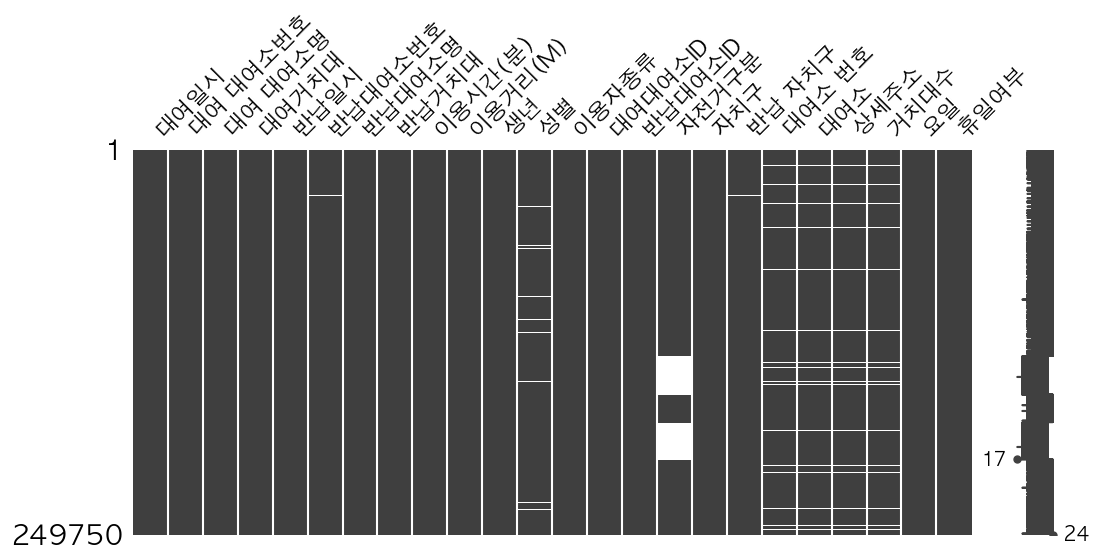

In [158]:
import missingno as msno 

msno.matrix(df_new, figsize=(12, 5))

> 성별, 자전거구분, 자치구, 반납자치구에 NaN 확인
> 자전거 구분은 새싹자전거와 일반자전거를 구분하는것이라 필요없다 판단 후 해당컬럼 삭제                                                  
* 새싹자전거 : 160미만인사람들 대상 및 성인이 아닌사람들 대상으로 이용 가능하다고 표기되어 있으나 성인도 사용가능한 것으로 확인                                         
* 일반자전거 : 일반적으로 따릉이 라고 하면 일반자전거를 지칭함                          

> 최종 목표가 해당 롯데월드타워 따릉이스테이션에 몇대가 있어야하는지를 예측하는것이기에 성별 컬럼 삭제


/var/folders/b4/mj76666j60z2b6lck86w49wh0000gn/T/ipykernel_10922/727295281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(columns=['자전거구분', '성별'], inplace=True)


<Axes: >

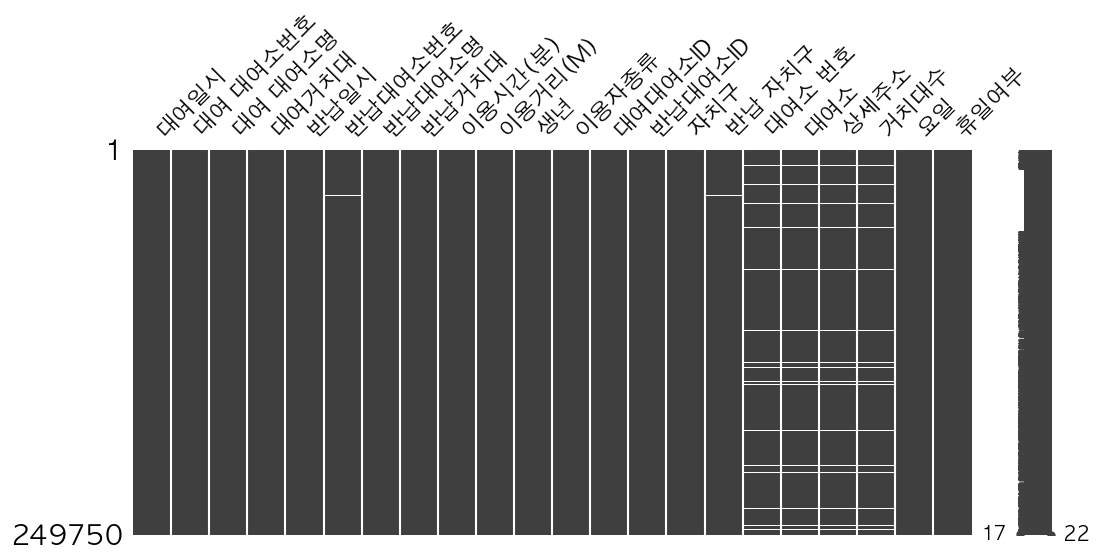

In [159]:
df_new.drop(columns=['자전거구분', '성별'], inplace=True)
msno.matrix(df_new, figsize=(12, 5))

In [160]:
# '반납 자치구' 컬럼에서 null 값을 가진 행들 확인
null_data = df_new[df_new['반납 자치구'].isnull()]

# 결과 출력
print(null_data)

                       대여일시  대여 대여소번호            대여 대여소명  대여거치대  \
1754    2024-04-01 07:48:58      1210  롯데월드타워(잠실역2번출구 쪽)      0   
6088    2024-04-01 13:53:13      1210  롯데월드타워(잠실역2번출구 쪽)      0   
12726   2024-04-01 18:34:00      1210  롯데월드타워(잠실역2번출구 쪽)      0   
13381   2024-04-01 19:50:40      1210  롯데월드타워(잠실역2번출구 쪽)      0   
21021   2024-04-02 08:54:59      1210  롯데월드타워(잠실역2번출구 쪽)      0   
...                     ...       ...                ...    ...   
5192523 2023-09-30 15:25:16      1210  롯데월드타워(잠실역2번출구 쪽)      0   
5195754 2023-09-30 17:09:31      1210  롯데월드타워(잠실역2번출구 쪽)      0   
5196696 2023-09-30 20:09:00      1210  롯데월드타워(잠실역2번출구 쪽)     99   
5197393 2023-09-30 20:51:05      1210  롯데월드타워(잠실역2번출구 쪽)      0   
5198124 2023-09-30 21:45:09      1210  롯데월드타워(잠실역2번출구 쪽)      0   

                       반납일시  반납대여소번호     반납대여소명 반납거치대  이용시간(분)  이용거리(M)  ...  \
1754    2024-04-01 08:05:02      NaN         \N    \N       15   874.00  ...   
6088    2024-04-01 14:08:44   4876.

> 확인해보니 \N도 포함되어있음 다른곳에서 되어있을수도 있어 확인 후 NaN값으로 우선 변경

In [161]:
import numpy as np

In [162]:
# '\N'을 NaN으로 변환
df_new = df_new.replace('\\N', np.nan)

> NaN값 재확인

<Axes: >

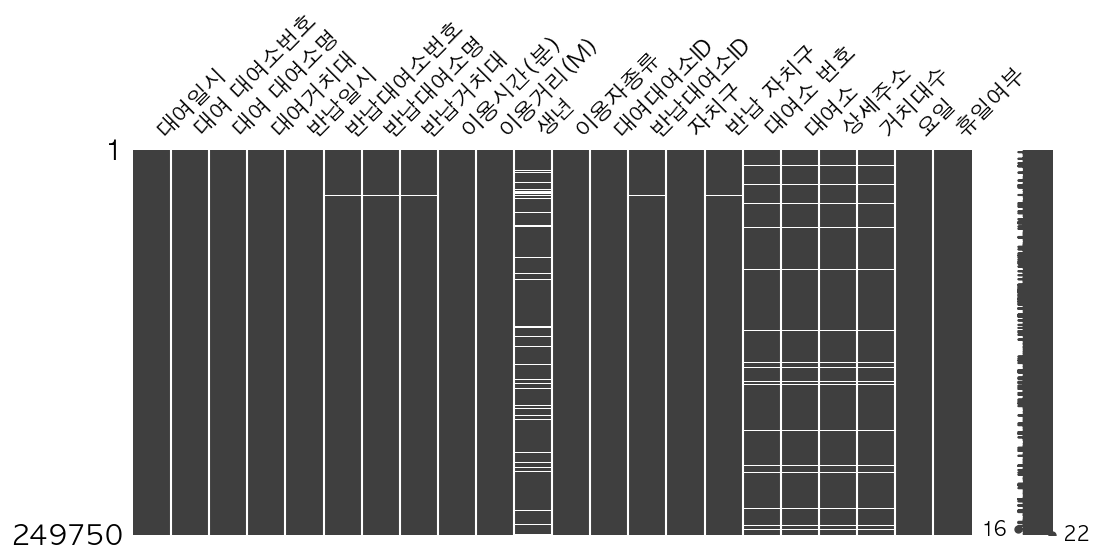

In [163]:
msno.matrix(df_new, figsize=(12, 5))

> 자치구와 반납 자치구는 NaN값이 있어도 많지는 않아 NaN이 있는 행 삭제              
> 이용객을 연령대별로 나눌건 아니라 생년 컬럼 삭제                  
> 거치대수는 송파구에있는것만 가져왔기때문에 다른구는 NaN으로 되어있을거라 NaN 삭제                 
> 상세주소는 대여소명이 주소라 중복된컬럼이라 삭제              
> 대여소는 반납대여소명과 대여 대여소명이 있어 불필요하여 삭제진행

In [164]:
df_new.drop(columns=['생년', '상세주소', '대여소 번호','대여소'], inplace=True)

In [165]:
df_new.isnull().sum()

대여일시            0
대여 대여소번호        0
대여 대여소명         0
대여거치대           0
반납일시            0
반납대여소번호       619
반납대여소명        619
반납거치대         680
이용시간(분)         0
이용거리(M)         0
이용자종류           0
대여대여소ID         0
반납대여소ID       619
자치구           729
반납 자치구       1590
거치대수        10496
요일              0
휴일여부            0
dtype: int64

> 반납 자치구, 반납대여소번호, 반납거치대, 반납대여소명, 반납대여소ID컬럼은 따릉이 대여후 분실로 파악하고 NaN값을 삭제               
> 자치구는 송파구만 진행할꺼라 NaN값 삭제

In [166]:
# NaN 값 삭제 전 행 수 확인
print("삭제 전 행 수:", len(df_new))

# '반납대여소번호', '반납대여소명', '반납거치대', '반납대여소ID', '자치구', '반납 자치구'의 NaN 값이 있는 행 삭제
df_new = df_new.dropna(subset=['반납대여소번호', '반납대여소명', '반납거치대', '반납대여소ID', '자치구', '반납 자치구', '거치대수'])

# 삭제 후 행 수 확인
print("삭제 후 행 수:", len(df_new))

# 결과 확인
print(df_new.isnull().sum())

삭제 전 행 수: 249750
삭제 후 행 수: 237605
대여일시        0
대여 대여소번호    0
대여 대여소명     0
대여거치대       0
반납일시        0
반납대여소번호     0
반납대여소명      0
반납거치대       0
이용시간(분)     0
이용거리(M)     0
이용자종류       0
대여대여소ID     0
반납대여소ID     0
자치구         0
반납 자치구      0
거치대수        0
요일          0
휴일여부        0
dtype: int64


> 전체 데이거야 약 4.86% 줄음

In [167]:
df_new.head()

,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),이용자종류,대여대여소ID,반납대여소ID,자치구,반납 자치구,거치대수,요일,휴일여부
94,2024-04-01 00:34:21,1210,롯데월드타워(잠실역2번출구 쪽),0,2024-04-01 00:40:39,2639.0,석촌역 8번출구,0,6,982.62,내국인,ST-891,ST-1866,송파구,송파구,30.0,0,0
195,2024-04-01 01:07:58,2658,가락몰 업무동,0,2024-04-01 01:21:55,1210.0,롯데월드타워(잠실역2번출구 쪽),0,13,2478.81,내국인,ST-2409,ST-891,송파구,송파구,10.0,0,0
250,2024-04-01 01:23:55,1222,잠실새내역 5번 출구 뒤,0,2024-04-01 01:44:58,1210.0,롯데월드타워(잠실역2번출구 쪽),0,21,1460.00,내국인,ST-547,ST-891,송파구,송파구,23.0,0,0
361,2024-04-01 02:55:30,1210,롯데월드타워(잠실역2번출구 쪽),0,2024-04-01 03:07:56,2646.0,레이크펠리스101동앞,0,12,1301.57,비회원,ST-891,ST-1867,송파구,송파구,30.0,0,0
362,2024-04-01 02:55:24,1210,롯데월드타워(잠실역2번출구 쪽),0,2024-04-01 03:08:10,2646.0,레이크펠리스101동앞,0,12,1390.00,내국인,ST-891,ST-1867,송파구,송파구,30.0,0,0


In [168]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237605 entries, 94 to 5199770
Data columns (total 18 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   대여일시      237605 non-null  datetime64[ns]
 1   대여 대여소번호  237605 non-null  int64         
 2   대여 대여소명   237605 non-null  object        
 3   대여거치대     237605 non-null  int64         
 4   반납일시      237605 non-null  datetime64[ns]
 5   반납대여소번호   237605 non-null  float64       
 6   반납대여소명    237605 non-null  object        
 7   반납거치대     237605 non-null  object        
 8   이용시간(분)   237605 non-null  int64         
 9   이용거리(M)   237605 non-null  float64       
 10  이용자종류     237605 non-null  object        
 11  대여대여소ID   237605 non-null  object        
 12  반납대여소ID   237605 non-null  object        
 13  자치구       237605 non-null  object        
 14  반납 자치구    237605 non-null  object        
 15  거치대수      237605 non-null  float64       
 16  요일        237605 non-null  int32         

## 날짜 데이터 불러와서 merge

In [169]:
df_w = pd.read_csv("../data/송파구날씨통합.csv")
df_w.head()

,지점,지점명,일시,기온(°C),강수량(mm),습도(%),전운량(10분위),시정(10m),date,시간,PM10,PM25
0,108,서울,2023-05-01 00:00:00,12.1,0.0,87,9,1049,2023-05-01,0,67.0,30.0
1,108,서울,2023-05-01 01:00:00,11.6,0.0,88,6,957,2023-05-01,1,66.0,26.0
2,108,서울,2023-05-01 02:00:00,11.0,0.0,90,6,778,2023-05-01,2,64.0,28.0
3,108,서울,2023-05-01 03:00:00,10.8,0.0,91,8,672,2023-05-01,3,58.0,22.0
4,108,서울,2023-05-01 04:00:00,10.4,0.0,92,8,633,2023-05-01,4,56.0,22.0


#### 필요없는 컬럼 삭제

In [170]:
df_w.drop(columns=['지점', '지점명', '일시','전운량(10분위)', '시정(10m)','습도(%)'], inplace=True)
df_w.head()

,기온(°C),강수량(mm),date,시간,PM10,PM25
0,12.1,0.0,2023-05-01,0,67.0,30.0
1,11.6,0.0,2023-05-01,1,66.0,26.0
2,11.0,0.0,2023-05-01,2,64.0,28.0
3,10.8,0.0,2023-05-01,3,58.0,22.0
4,10.4,0.0,2023-05-01,4,56.0,22.0


In [171]:
df_w['date'] = pd.to_datetime(df_w['date'])

**미세먼지 기준(좋음/보통/나쁨/매우나쁨)**
- PM10: ~30/~80/~150/151~
- PM2.5: ~15/~35/~75/75~

In [172]:
df_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9528 entries, 0 to 9527
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   기온(°C)   9528 non-null   float64       
 1   강수량(mm)  9528 non-null   float64       
 2   date     9528 non-null   datetime64[ns]
 3   시간       9528 non-null   int64         
 4   PM10     9363 non-null   float64       
 5   PM25     9385 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 446.8 KB


### 날씨 데이터와 df_new merge

In [173]:
df_new['대여날짜'] = df_new['대여일시'].dt.date
df_new['대여시간'] = df_new['대여일시'].dt.hour

In [174]:
df_w['날짜'] = df_w['date'].dt.date

In [175]:
df_w['날짜'] = pd.to_datetime(df_w['날짜'])
df_new['대여날짜'] = pd.to_datetime(df_new['대여날짜'])
df_w['시간'] = df_w['시간'].astype(int)
df_new['대여시간'] = df_new['대여시간'].astype(int)


In [176]:
df_merged_lotte = pd.merge(df_new, df_w, left_on=['대여날짜', '대여시간'], right_on=['날짜', '시간'], how='left')

In [177]:
df_merged_lotte.head()

,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),...,휴일여부,대여날짜,대여시간,기온(°C),강수량(mm),date,시간,PM10,PM25,날짜
0,2024-04-01 00:34:21,1210,롯데월드타워(잠실역2번출구 쪽),0,2024-04-01 00:40:39,2639.0,석촌역 8번출구,0,6,982.62,...,0,2024-04-01,0,9.5,0.0,2024-04-01,0,54.0,13.0,2024-04-01
1,2024-04-01 01:07:58,2658,가락몰 업무동,0,2024-04-01 01:21:55,1210.0,롯데월드타워(잠실역2번출구 쪽),0,13,2478.81,...,0,2024-04-01,1,8.6,0.0,2024-04-01,1,54.0,15.0,2024-04-01
2,2024-04-01 01:23:55,1222,잠실새내역 5번 출구 뒤,0,2024-04-01 01:44:58,1210.0,롯데월드타워(잠실역2번출구 쪽),0,21,1460.00,...,0,2024-04-01,1,8.6,0.0,2024-04-01,1,54.0,15.0,2024-04-01
3,2024-04-01 02:55:30,1210,롯데월드타워(잠실역2번출구 쪽),0,2024-04-01 03:07:56,2646.0,레이크펠리스101동앞,0,12,1301.57,...,0,2024-04-01,2,7.7,0.0,2024-04-01,2,57.0,16.0,2024-04-01
4,2024-04-01 02:55:24,1210,롯데월드타워(잠실역2번출구 쪽),0,2024-04-01 03:08:10,2646.0,레이크펠리스101동앞,0,12,1390.00,...,0,2024-04-01,2,7.7,0.0,2024-04-01,2,57.0,16.0,2024-04-01


In [178]:
df_merged_lotte.isnull().sum()

대여일시           0
대여 대여소번호       0
대여 대여소명        0
대여거치대          0
반납일시           0
반납대여소번호        0
반납대여소명         0
반납거치대          0
이용시간(분)        0
이용거리(M)        0
이용자종류          0
대여대여소ID        0
반납대여소ID        0
자치구            0
반납 자치구         0
거치대수           0
요일             0
휴일여부           0
대여날짜           0
대여시간           0
기온(°C)         0
강수량(mm)        0
date           0
시간             0
PM10        3905
PM25        3336
날짜             0
dtype: int64

In [179]:
df_merged_lotte.columns

Index(['대여일시', '대여 대여소번호', '대여 대여소명', '대여거치대', '반납일시', '반납대여소번호', '반납대여소명',
       '반납거치대', '이용시간(분)', '이용거리(M)', '이용자종류', '대여대여소ID', '반납대여소ID', '자치구',
       '반납 자치구', '거치대수', '요일', '휴일여부', '대여날짜', '대여시간', '기온(°C)', '강수량(mm)',
       'date', '시간', 'PM10', 'PM25', '날짜'],
      dtype='object')

<Axes: >

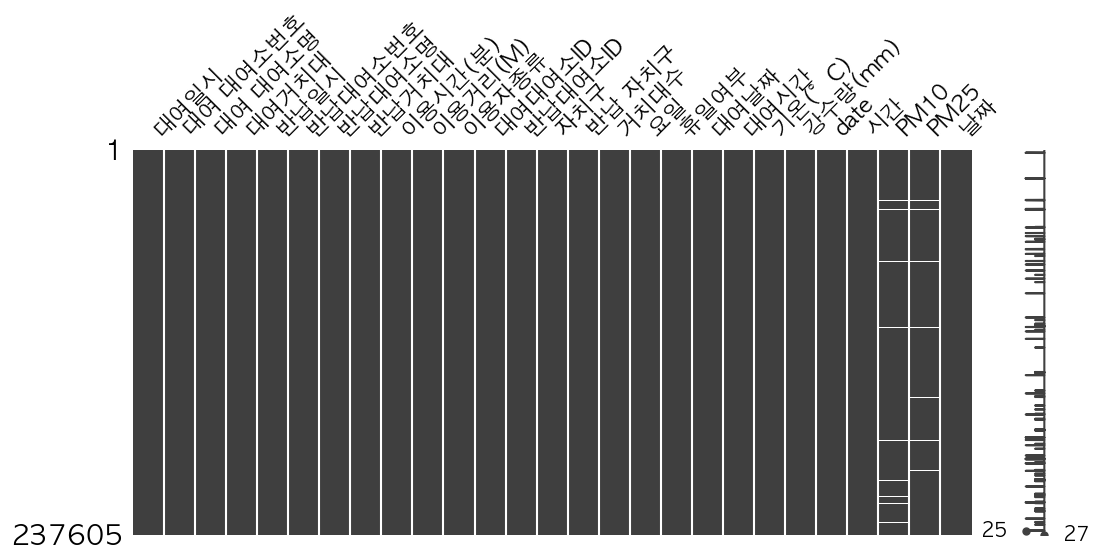

In [180]:
msno.matrix(df_merged_lotte, figsize=(12, 5))

#### 미세먼지 농도 관련된 데이에 NaN값 확인됨
> 시간대별 평균으로 대치

In [181]:
df_merged_lotte['PM10'] = df_merged_lotte.groupby('대여시간')['PM10'].transform(lambda x: x.fillna(x.mean()))
df_merged_lotte['PM25'] = df_merged_lotte.groupby('대여시간')['PM25'].transform(lambda x: x.fillna(x.mean()))


대여일시        0
대여 대여소번호    0
대여 대여소명     0
대여거치대       0
반납일시        0
반납대여소번호     0
반납대여소명      0
반납거치대       0
이용시간(분)     0
이용거리(M)     0
이용자종류       0
대여대여소ID     0
반납대여소ID     0
자치구         0
반납 자치구      0
거치대수        0
요일          0
휴일여부        0
대여날짜        0
대여시간        0
기온(°C)      0
강수량(mm)     0
date        0
시간          0
PM10        0
PM25        0
날짜          0
dtype: int64

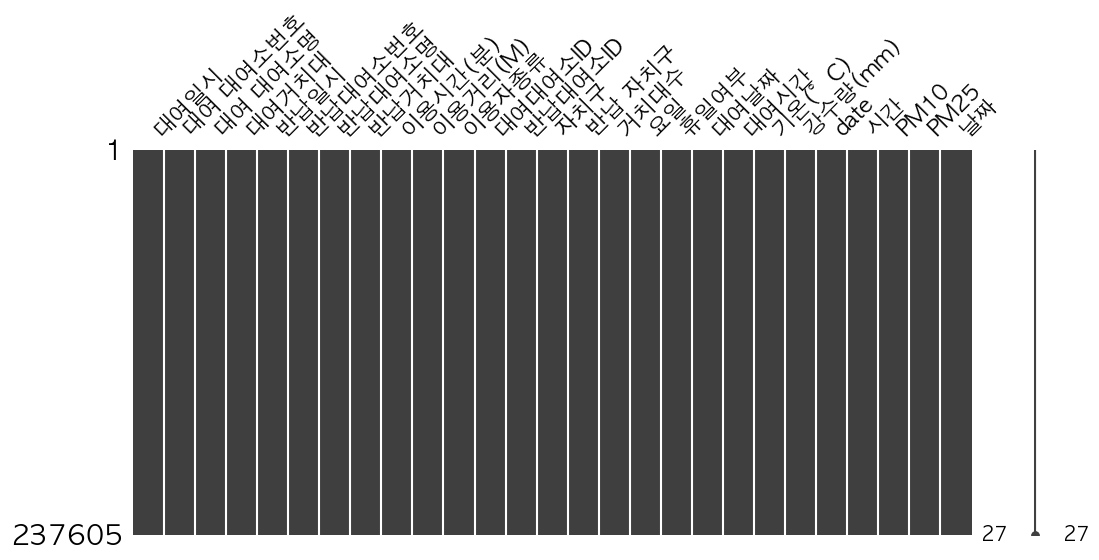

In [182]:
msno.matrix(df_merged_lotte, figsize=(12, 5))
df_merged_lotte.isnull().sum()

---
# 롯대 데이터만 출력

In [183]:
# 대여 데이터 추출
lotte_world_df = df[df['대여 대여소명'] == '롯데월드타워(잠실역2번출구 쪽)']

# 반납 데이터 추출
lotte_world_return_df = df[df['반납대여소명'] == '롯데월드타워(잠실역2번출구 쪽)']

print("대여 데이터:")
print(lotte_world_df.shape)
print(lotte_world_df.head())

print("\n반납 데이터:")
print(lotte_world_return_df.shape)
print(lotte_world_return_df.head())


대여 데이터:
(129032, 19)
         자전거번호                 대여일시  대여 대여소번호            대여 대여소명  대여거치대  \
94   SPB-69309  2024-04-01 00:34:21      1210  롯데월드타워(잠실역2번출구 쪽)      0   
361  SPB-37133  2024-04-01 02:55:30      1210  롯데월드타워(잠실역2번출구 쪽)      0   
362  SPB-66954  2024-04-01 02:55:24      1210  롯데월드타워(잠실역2번출구 쪽)      0   
677  SPB-68175  2024-04-01 06:21:13      1210  롯데월드타워(잠실역2번출구 쪽)      0   
700  SPB-65003  2024-04-01 06:28:59      1210  롯데월드타워(잠실역2번출구 쪽)      0   

                    반납일시  반납대여소번호             반납대여소명 반납거치대  이용시간(분)  이용거리(M)  \
94   2024-04-01 00:40:39   2639.0           석촌역 8번출구     0        6   982.62   
361  2024-04-01 03:07:56   2646.0        레이크펠리스101동앞     0       12  1301.57   
362  2024-04-01 03:08:10   2646.0        레이크펠리스101동앞     0       12  1390.00   
677  2024-04-01 06:23:39   2608.0               송파구청     0        2   630.00   
700  2024-04-01 06:29:06   1210.0  롯데월드타워(잠실역2번출구 쪽)     0        0     0.00   

       생년  성별 이용자종류 대여대여소ID  반납대여소ID  자전거구분  자치

In [184]:
print(f"대여 : {len(lotte_world_df)}")
print(f"반납 : {len(lotte_world_return_df)}")

대여 : 129032
반납 : 128687


---
# 롯데만 출력하여 저장

In [185]:
df_lotte = df[(df['대여 대여소명'] == '롯데월드타워(잠실역2번출구 쪽)') | (df['반납대여소명'] == '롯데월드타워(잠실역2번출구 쪽)')]
df_lotte.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249750 entries, 94 to 5199770
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   자전거번호     249750 non-null  object 
 1   대여일시      249750 non-null  object 
 2   대여 대여소번호  249750 non-null  int64  
 3   대여 대여소명   249750 non-null  object 
 4   대여거치대     249750 non-null  int64  
 5   반납일시      249750 non-null  object 
 6   반납대여소번호   249131 non-null  float64
 7   반납대여소명    249750 non-null  object 
 8   반납거치대     249750 non-null  object 
 9   이용시간(분)   249750 non-null  int64  
 10  이용거리(M)   249750 non-null  float64
 11  생년        249750 non-null  object 
 12  성별        241686 non-null  object 
 13  이용자종류     249750 non-null  object 
 14  대여대여소ID   249750 non-null  object 
 15  반납대여소ID   249750 non-null  object 
 16  자전거구분     200359 non-null  object 
 17  자치구       249021 non-null  object 
 18  반납 자치구    248160 non-null  object 
dtypes: float64(2), int64(3), object(14)
memory usag

In [186]:
len(df_lotte)

249750

In [187]:
df_lotte.to_csv("../data/lotte.csv", index=False)

In [188]:
df = pd.read_csv("../data/lotte.csv")
df.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID,자전거구분,자치구,반납 자치구
0,SPB-69309,2024-04-01 00:34:21,1210,롯데월드타워(잠실역2번출구 쪽),0,2024-04-01 00:40:39,2639.0,석촌역 8번출구,0,6,982.62,1997,\N,내국인,ST-891,ST-1866,일반자전거,송파구,송파구
1,SPB-37133,2024-04-01 01:07:58,2658,가락몰 업무동,0,2024-04-01 01:21:55,1210.0,롯데월드타워(잠실역2번출구 쪽),0,13,2478.81,1979,M,내국인,ST-2409,ST-891,일반자전거,송파구,송파구
2,SPB-66954,2024-04-01 01:23:55,1222,잠실새내역 5번 출구 뒤,0,2024-04-01 01:44:58,1210.0,롯데월드타워(잠실역2번출구 쪽),0,21,1460.00,1994,M,내국인,ST-547,ST-891,일반자전거,송파구,송파구
3,SPB-37133,2024-04-01 02:55:30,1210,롯데월드타워(잠실역2번출구 쪽),0,2024-04-01 03:07:56,2646.0,레이크펠리스101동앞,0,12,1301.57,\N,\N,비회원,ST-891,ST-1867,일반자전거,송파구,송파구
4,SPB-66954,2024-04-01 02:55:24,1210,롯데월드타워(잠실역2번출구 쪽),0,2024-04-01 03:08:10,2646.0,레이크펠리스101동앞,0,12,1390.00,2000,M,내국인,ST-891,ST-1867,일반자전거,송파구,송파구


In [189]:
len(df)

249750